In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)
print(x_train.shape)
print(x_test.shape )

(25000,)
(25000,)


In [4]:
x_train[:5]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [6]:
y_train[:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
x_train = pad_sequences(x_train, maxlen = 200)
x_test = pad_sequences(x_test, maxlen = 200)

In [9]:
import numpy as np


In [10]:
x_train = np.asarray(x_train).astype("float32")

x_test = np.asarray(x_test).astype("float32")


In [11]:
import keras

In [12]:
model = keras.Sequential([
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

In [13]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 512, validation_split = 0.2)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5018 - loss: 290.5149 - val_accuracy: 0.4960 - val_loss: 118.7437
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5077 - loss: 99.3732 - val_accuracy: 0.5036 - val_loss: 60.1254
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5112 - loss: 51.8083 - val_accuracy: 0.4948 - val_loss: 32.4168
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5112 - loss: 25.9645 - val_accuracy: 0.5002 - val_loss: 16.2399
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5126 - loss: 12.5285 - val_accuracy: 0.5036 - val_loss: 8.6485
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5013 - loss: 7.5097 - val_accuracy: 0.5036 - val_loss: 5.3913
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5053 - loss: 4.6084 - val_accuracy: 0.5044 - val_loss: 4.8500
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5009 - loss: 3.6998 - val_accuracy:

In [15]:
dict_data = history.history

In [16]:
dict_data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [17]:
import matplotlib.pyplot as plt

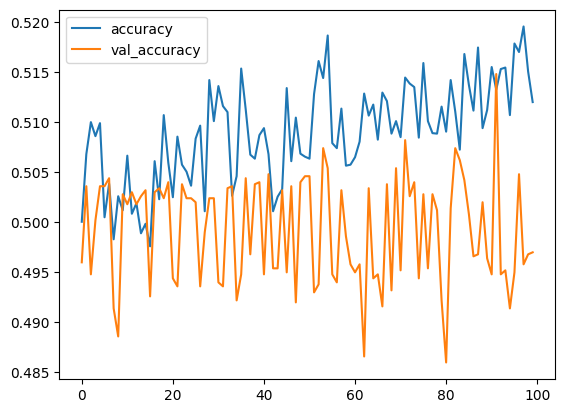

In [18]:
accuracy = dict_data['accuracy']
val_accuracy = dict_data['val_accuracy']
loss = dict_data['loss']
val_loss = dict_data['val_loss']


plt.plot(accuracy, label = 'accuracy')
plt.plot(val_accuracy, label = 'val_accuracy')
plt.legend()
plt.show()

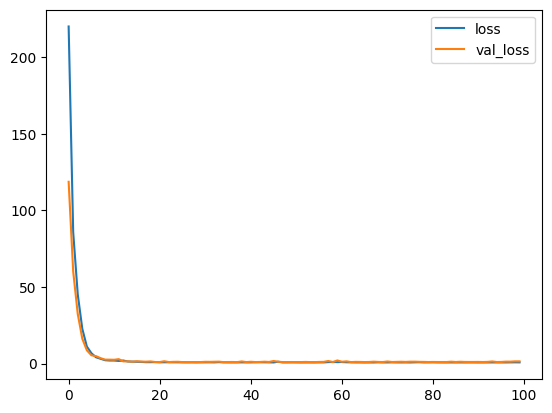

In [19]:
plt.plot(loss, label = 'loss')
plt.plot(val_loss, label = 'val_loss')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer

def predict_review(review, model, tokenizer, max_len=200):
    """
    Predict the sentiment of a review.

    Args:
        review (str): The input review as a string.
        model (keras.Model): The trained model.
        tokenizer (Tokenizer): The tokenizer for the IMDB dataset.
        max_len (int): Maximum length for padding sequences.

    Returns:
        str: "Positive" or "Negative" based on the prediction.
    """
    # Tokenize and convert the review to sequences
    review_seq = tokenizer.texts_to_sequences([review])
    # Pad the sequence
    review_seq_padded = pad_sequences(review_seq, maxlen=max_len)
    # Predict the sentiment
    prediction = model.predict(review_seq_padded)
    # Return the result
    return "Positive" if prediction[0] > 0.5 else "Negative"

# Example usage:
# Create the IMDB tokenizer (this is based on the IMDB dataset used earlier)
imdb_tokenizer = Tokenizer(num_words=10000)
imdb_tokenizer.fit_on_texts([''])  # Initialize tokenizer for IMDB dataset

# Replace this with the actual review you want to predict
example_review = "This movie was fantastic! The acting was superb and the story was gripping."

# Predict the sentiment
result = predict_review(example_review, model, imdb_tokenizer)
print(f"The review sentiment is: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
The review sentiment is: Negative
